In [1]:
!pip install pyscrappy

     |████████████████████████████████| 958 kB 18.1 MB/s 
     |████████████████████████████████| 356 kB 60.0 MB/s 
     |████████████████████████████████| 138 kB 43.2 MB/s 
     |████████████████████████████████| 138 kB 65.6 MB/s 
     |████████████████████████████████| 138 kB 69.7 MB/s 
     |████████████████████████████████| 138 kB 69.7 MB/s 
     |████████████████████████████████| 153 kB 70.0 MB/s 
     |████████████████████████████████| 137 kB 71.6 MB/s 
     |████████████████████████████████| 136 kB 61.6 MB/s 
     |████████████████████████████████| 136 kB 65.7 MB/s 
     |████████████████████████████████| 136 kB 70.7 MB/s 
INFO: pip is looking at multiple versions of trio-websocket to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of attrs to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 60 kB 8.6 MB/s 
     |███████

In [4]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [6]:
df=pd.read_csv('Fitness_trackers.csv',thousands=',')
df.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      565 non-null    object 
 1   Device Type                     565 non-null    object 
 2   Model Name                      565 non-null    object 
 3   Color                           565 non-null    object 
 4   Selling Price                   565 non-null    int64  
 5   Original Price                  565 non-null    int64  
 6   Display                         565 non-null    object 
 7   Rating (Out of 5)               514 non-null    float64
 8   Strap Material                  565 non-null    object 
 9   Average Battery Life (in days)  565 non-null    int64  
 10  Reviews                         78 non-null     float64
dtypes: float64(2), int64(3), object(6)
memory usage: 48.7+ KB


In [8]:
df.dtypes

Brand Name                         object
Device Type                        object
Model Name                         object
Color                              object
Selling Price                       int64
Original Price                      int64
Display                            object
Rating (Out of 5)                 float64
Strap Material                     object
Average Battery Life (in days)      int64
Reviews                           float64
dtype: object

In [9]:
df.shape

(565, 11)

In [11]:
df.describe()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
count,565.000000,565.000000,514.000000,565.000000,78.000000
mean,22110.373451,25365.361062,4.229961,9.026549,2492.948718
std,19914.926066,20384.028759,0.390827,7.868670,5607.529743
min,1195.000000,1599.000000,2.000000,1.000000,2.000000
25%,8990.000000,12999.000000,4.025000,2.000000,107.750000
50%,15995.000000,19995.000000,4.300000,7.000000,346.000000
75%,29900.000000,32900.000000,4.500000,14.000000,1580.750000
max,122090.000000,122090.000000,5.000000,45.000000,23426.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling Price,565.0,22110.373451,19914.926066,1195.0,8990.000,15995.0,29900.00,122090.0
Original Price,565.0,25365.361062,20384.028759,1599.0,12999.000,19995.0,32900.00,122090.0
Rating (Out of 5),514.0,4.229961,0.390827,2.0,4.025,4.3,4.50,5.0
Average Battery Life (in days),565.0,9.026549,7.868670,1.0,2.000,7.0,14.00,45.0
Reviews,78.0,2492.948718,5607.529743,2.0,107.750,346.0,1580.75,23426.0


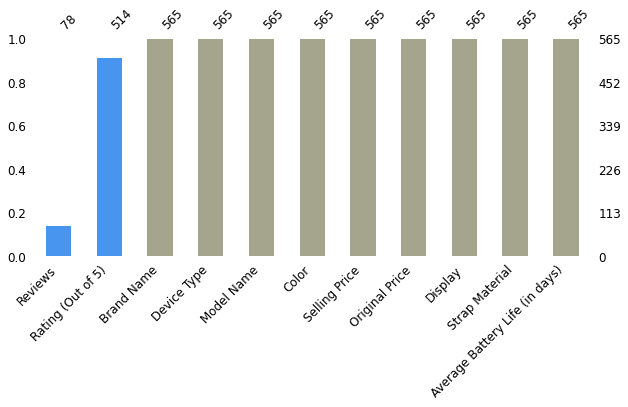

In [12]:
#Missing values
color=['#4895ef','#4895ef','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d']
msno.bar(df,figsize=(10,4), color=color,fontsize=12,sort="ascending")

In [13]:
# count of products
df['Brand Name'].groupby(df['Device Type']).count().sort_values(ascending=False)

Device Type
Smartwatch     490
FitnessBand     75
Name: Brand Name, dtype: int64

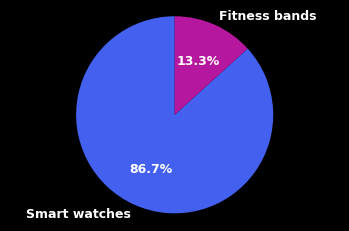

In [14]:
# Device Type distribution
labels = 'Smart watches', 'Fitness bands'
sizes = [490,75]
fig1, ax1 = plt.subplots()
fig1.set_facecolor('black')
ax1.pie(sizes, labels=labels, colors=["#4361EE",'#b5179e'],autopct='%1.1f%%', startangle=90,textprops={'color':'w','weight':'bold','fontsize':12.5})
ax1.axis('equal')
plt.show()

In [15]:
#count of brands
df['Brand Name'].nunique()

20

In [16]:
df['Brand Name'].groupby(df['Brand Name']).count().sort_values(ascending=False)

Brand Name
FOSSIL      133
GARMIN      101
APPLE        86
FitBit       51
SAMSUNG      48
huami        36
Huawei       26
Honor        20
Noise        17
realme       12
Xiaomi       10
Fastrack      6
GOQii         4
boAt          4
OnePlus       3
Noise         2
Oppo          2
LCARE         2
LAVA          1
Infinix       1
Name: Brand Name, dtype: int64

In [17]:
df['Brand Name'].groupby(df['Brand Name']).count().sort_values(ascending=False).iloc[:5]

Brand Name
FOSSIL      133
GARMIN      101
APPLE        86
FitBit       51
SAMSUNG      48
Name: Brand Name, dtype: int64

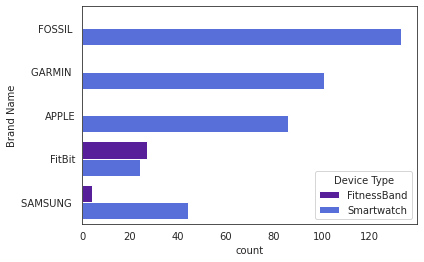

In [18]:
#product counts
sns.set_style('white')
sns.countplot(y="Brand Name", hue="Device Type", data=df, palette=["#560bad","#4361EE"], 
order=df["Brand Name"].value_counts().iloc[:5].index)

In [19]:
df['Device Type'].groupby(df['Brand Name']).count().sort_values(ascending=False).iloc[:1]

Brand Name
FOSSIL     133
Name: Device Type, dtype: int64

In [20]:
df['Device Type'].groupby(df['Brand Name']).count().sort_values(ascending=False)

Brand Name
FOSSIL      133
GARMIN      101
APPLE        86
FitBit       51
SAMSUNG      48
huami        36
Huawei       26
Honor        20
Noise        17
realme       12
Xiaomi       10
Fastrack      6
GOQii         4
boAt          4
OnePlus       3
Noise         2
Oppo          2
LCARE         2
LAVA          1
Infinix       1
Name: Device Type, dtype: int64

In [22]:
#average ratings by Brand
round(df.groupby('Brand Name')['Rating (Out of 5)'].mean().sort_values(ascending=False).iloc[:10],1)

Brand Name
APPLE       4.5
OnePlus     4.3
FOSSIL      4.2
SAMSUNG     4.2
Honor       4.2
FitBit      4.2
Xiaomi      4.2
Huawei      4.2
huami       4.2
realme      4.1
Name: Rating (Out of 5), dtype: float64

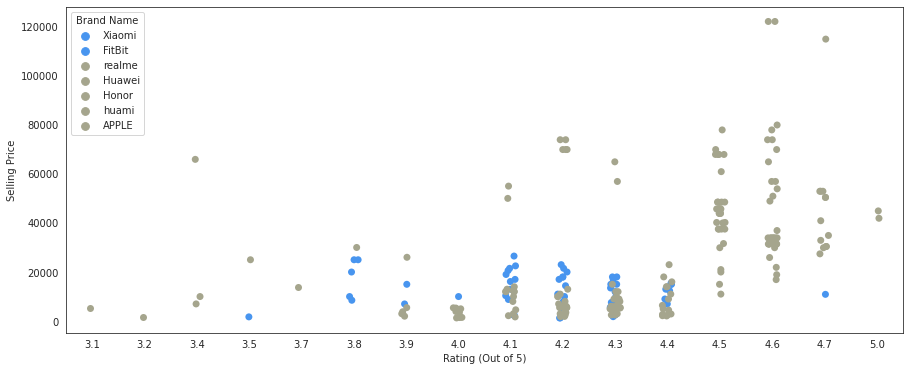

In [25]:
# Rating vs Selling Price
#filter by Brand
list = ["APPLE","OnePlus","FOSSIL","SAMSUNG","Honor","FitBit","Xiaomi","Huawei","huami","realme"]
series = df["Brand Name"].isin(list)
df_f = df[series]
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.stripplot(x="Rating (Out of 5)", y="Selling Price", data=df_f,hue="Brand Name", palette=color,size=7, marker="o")

In [26]:
# Brandwise Mean Selling prices
round(df.groupby('Brand Name')['Average Battery Life (in days)'].mean(),0).sort_values(ascending=False)

Brand Name
GARMIN      17.0
huami       16.0
Oppo        14.0
Honor       12.0
Xiaomi      12.0
SAMSUNG     12.0
Huawei      11.0
realme      10.0
OnePlus      9.0
boAt         8.0
FitBit       7.0
GOQii        7.0
LAVA         7.0
Noise        7.0
LCARE        6.0
Fastrack     6.0
Noise        5.0
FOSSIL       5.0
Infinix      4.0
APPLE        1.0
Name: Average Battery Life (in days), dtype: float64

In [27]:
#filter dataframe
df_p=df[(df["Selling Price"] >= 10000) & (df["Selling Price"] <= 30000)]
df_p.iloc[:2]
alt.Chart(df_p).mark_point(filled=True,size=40).encode(
    x='Original Price',
    y='Selling Price',
    color='Brand Name',
    tooltip=['Brand Name', 'Selling Price', 'Original Price']
).interactive()

alt.Chart(...)

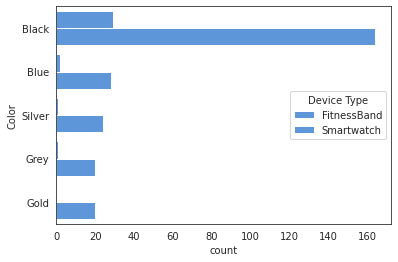

In [29]:
#Color counts
sns.countplot(y="Color", hue="Device Type", data=df, palette=color, order=df["Color"].value_counts().iloc[:5].index)

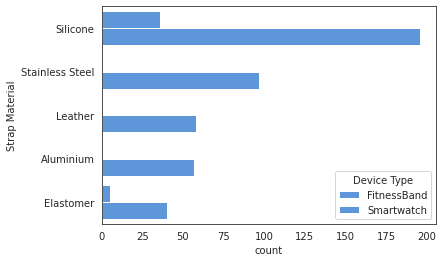

In [30]:
#Color counts
sns.countplot(y="Strap Material", hue="Device Type", data=df, palette=color, order=df["Strap Material"].value_counts().iloc[:5].index)

In [31]:
# Brandwise Mean Selling prices
df.groupby('Brand Name')['Selling Price'].mean().sort_values(ascending=False).apply(np.ceil)

Brand Name
APPLE       49414.0
GARMIN      35039.0
SAMSUNG     22902.0
Oppo        16490.0
Huawei      15875.0
FitBit      14019.0
FOSSIL      13825.0
huami        7548.0
OnePlus      6933.0
Honor        5510.0
realme       4403.0
boAt         4247.0
Xiaomi       4101.0
Noise        3330.0
GOQii        3124.0
LCARE        2347.0
LAVA         1999.0
Noise        1949.0
Fastrack     1755.0
Infinix      1499.0
Name: Selling Price, dtype: float64

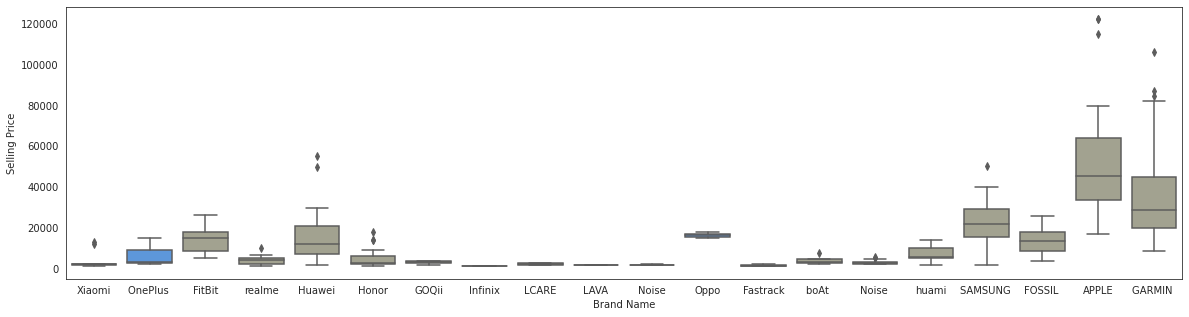

In [33]:
#Box plot to denote average selling prices
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.boxplot(x="Brand Name", y="Selling Price", data=df,palette=color)